In [1]:
import pandas as pd

In [2]:
df1 = pd.read_csv(r"C:\Users\91955\Downloads\Dataset\heart.csv", sep=',')

# Data Cleaning


In [6]:
df1.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [4]:
df1.isnull()

df1=df1.drop_duplicates()
df1=df1.dropna()


In [8]:
df1

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# Data Integerations

In [35]:
df2 = pd.read_csv(r'C:\Users\91955\Downloads\Dataset\airquality_data.csv', sep=',' , encoding='latin-1' )

C:\Users\91955\AppData\Local\Temp\ipykernel_7744\674843646.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv(r'C:\Users\91955\Downloads\Dataset\airquality_data.csv', sep=',' , encoding='latin-1' )


In [36]:
df2.duplicated().sum()
df2.isnull().sum()

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                7
dtype: int64

In [40]:
df2=df2.drop_duplicates()
df2=df2.dropna()

In [ ]:
# common_columns = df1.columns.intersection(df2.columns)
print(common_columns)

df3 = pd.concat([df, df2])

# Data Transformation:

In data science, data transformation refers to the process of converting or modifying raw data into a suitable format that can be used for analysis, modeling, or visualization. 
###### The fit_transform()
method of the scaler object is called with the selected 'chol' column as input. This method first calculates the mean and standard deviation of the column and then applies the standardization transformation to the column's values.
######  LabelEncoder()
 The LabelEncoder from scikit-learn is used to convert categorical values into numerical labels

In [47]:
df1['chol']

0      233
1      250
2      204
3      236
4      354
      ... 
298    241
299    264
300    193
301    131
302    236
Name: chol, Length: 302, dtype: int64

In [48]:
from sklearn.preprocessing import StandardScaler
stander = StandardScaler()

In [53]:
df1['chol'] = stander.fit_transform(df1[['chol']])

In [52]:
df1['chol']

0     -0.261285
1      0.067741
2     -0.822564
3     -0.203222
4      2.080602
         ...   
298   -0.106449
299    0.338703
300   -1.035462
301   -2.235438
302   -0.203222
Name: chol, Length: 302, dtype: float64

In [56]:
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()

df1['chol'] = encoder.fit_transform(df1['chol'])

In [57]:
df1['chol']

0       64
1       80
2       35
3       67
4      145
      ... 
298     71
299     93
300     26
301      1
302     67
Name: chol, Length: 302, dtype: int64

# Error correcting
import numpy as np: Imports the NumPy library, which provides functions for mathematical operations on arrays.

from scipy import stats: Imports the stats module from the SciPy library, which provides statistical functions and tools.

z_score = np.abs(stats.zscore(df2)): Calculates the z-scores for each value in the DataFrame df2. The z-score measures how many standard deviations a data point is away from the mean. This step helps identify potential outliers in the dataset.

threshold = 3: Sets the threshold value for determining outliers. Any data point with a z-score greater than this threshold (3 in this case) is considered an outlier.

filtered_data = df2[(z_score < threshold).all(axis=1)]: Filters the original DataFrame df2 by selecting rows where all the z-scores are less than the threshold. The .all(axis=1) ensures that all z-scores in a row meet the condition. This step removes rows containing outliers.

sns.boxplot(data=filtered_data): Creates a box plot using seaborn (sns) with the filtered data. A box plot is a graphical representation of the distribution of data, showing the quartiles, median, and potential outliers. The box plot is created using the filtered data, so it will exclude the outliers identified in the previous step.

Overall, this code segment performs outlier detection using z-scores and a threshold value. It filters the data by removing rows with z-scores exceeding the threshold and then visualizes the filtered data using a box plot. The box plot helps visualize the distribution and characteristics of the filtered data while highlighting any remaining potential outliers.



In [58]:
import seaborn as sns

<Axes: >

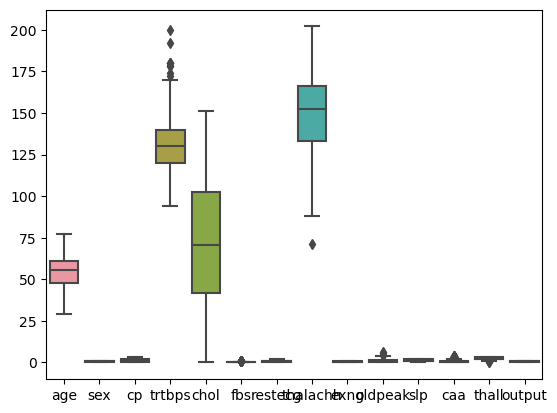

In [60]:
sns.boxplot(df1)

<Axes: >

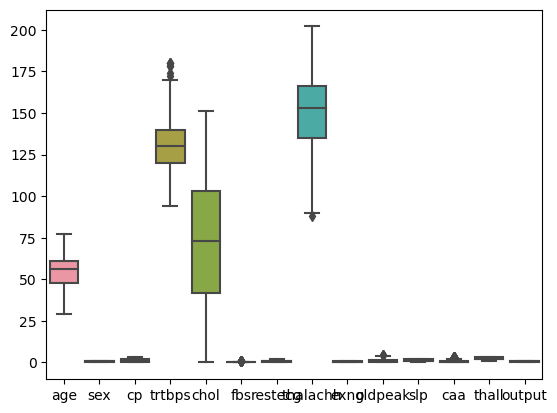

In [66]:
import numpy as np
from scipy import stats

z_score=np.abs(stats.zscore(df1))
threshold=3
filtered_data = df1[(z_score<threshold).all(axis=1)]
sns.boxplot(filtered_data)

# Data model building

###### axis=0 :
Operations performed along axis=0 will apply row-wise or vertically. 
###### axis=1 :
Operations performed along axis=1 will apply column-wise or horizontally

###### pd.get_dummies(x)
convert categorical variables into a binary representation that machine learning algorithms can work with

###### max_iter

maximum number of iterations that the solver algorithm will perform to converge to an optimal solution.

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [69]:
x = df1.drop('output', axis=1)
y = df1[['output']]

x = pd.get_dummies(x)
y = pd.get_dummies(y)

In [71]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3)

In [73]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, Y_train.values.ravel())

LogisticRegression(max_iter=1000)

In [74]:
from sklearn.metrics import accuracy_score
Y_predict = model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_predict)
accuracy

0.8681318681318682